In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the API key.
from config import weather_api_key
# Import the requests library.
import requests

In [2]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(-90,90, size=1500)
lngs = np.random.uniform(-180,180, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [3]:
# add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

628

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 4 of Set 1 | kodiak
Processing Record 5 of Set 1 | gemena
Processing Record 6 of Set 1 | leh
Processing Record 7 of Set 1 | port lincoln
Processing Record 8 of Set 1 | dikson
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | highland springs
Processing Record 11 of Set 1 | avarua
Processing Record 12 of Set 1 | sorvag
City not found. Skipping...
Processing Record 13 of Set 1 | nogliki
Processing Record 14 of Set 1 | pisco
Processing Record 15 of Set 1 | hofn
Processing Record 16 of Set 1 | victoria
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | yantai
Processing Record 21 of Set 1 | illoqqortoormiut
City not found. Skipping..

Processing Record 37 of Set 4 | qaqortoq
Processing Record 38 of Set 4 | westport
Processing Record 39 of Set 4 | rawson
Processing Record 40 of Set 4 | anadyr
Processing Record 41 of Set 4 | bitkine
Processing Record 42 of Set 4 | cidreira
Processing Record 43 of Set 4 | kiama
Processing Record 44 of Set 4 | samusu
City not found. Skipping...
Processing Record 45 of Set 4 | batangafo
Processing Record 46 of Set 4 | labutta
City not found. Skipping...
Processing Record 47 of Set 4 | hasaki
Processing Record 48 of Set 4 | tura
Processing Record 49 of Set 4 | half moon bay
Processing Record 50 of Set 4 | te anau
Processing Record 1 of Set 5 | tawkar
City not found. Skipping...
Processing Record 2 of Set 5 | biak
Processing Record 3 of Set 5 | lata
Processing Record 4 of Set 5 | mansfield
Processing Record 5 of Set 5 | salalah
Processing Record 6 of Set 5 | jalu
Processing Record 7 of Set 5 | numan
Processing Record 8 of Set 5 | taoudenni
Processing Record 9 of Set 5 | makakilo city
Proce

Processing Record 21 of Set 8 | ponta do sol
Processing Record 22 of Set 8 | inhambane
Processing Record 23 of Set 8 | santa cruz
Processing Record 24 of Set 8 | farah
Processing Record 25 of Set 8 | saint-francois
Processing Record 26 of Set 8 | lubyany
Processing Record 27 of Set 8 | staicele
Processing Record 28 of Set 8 | luba
Processing Record 29 of Set 8 | isangel
Processing Record 30 of Set 8 | saleaula
City not found. Skipping...
Processing Record 31 of Set 8 | broken hill
Processing Record 32 of Set 8 | usakos
Processing Record 33 of Set 8 | lermontovka
Processing Record 34 of Set 8 | oktyabrskoye
Processing Record 35 of Set 8 | toftir
City not found. Skipping...
Processing Record 36 of Set 8 | shushtar
Processing Record 37 of Set 8 | meyungs
City not found. Skipping...
Processing Record 38 of Set 8 | mackay
Processing Record 39 of Set 8 | palmer
Processing Record 40 of Set 8 | constantine
Processing Record 41 of Set 8 | terney
Processing Record 42 of Set 8 | pandan
Processing

Processing Record 11 of Set 12 | balykshi
Processing Record 12 of Set 12 | saint anthony
Processing Record 13 of Set 12 | mehamn
Processing Record 14 of Set 12 | folkestone
Processing Record 15 of Set 12 | pangnirtung
Processing Record 16 of Set 12 | kem
Processing Record 17 of Set 12 | snezhnogorsk
Processing Record 18 of Set 12 | solca
Processing Record 19 of Set 12 | gourdon
Processing Record 20 of Set 12 | sao miguel do araguaia
Processing Record 21 of Set 12 | gitarama
Processing Record 22 of Set 12 | chik
Processing Record 23 of Set 12 | grafton
Processing Record 24 of Set 12 | pauini
Processing Record 25 of Set 12 | rio grande
Processing Record 26 of Set 12 | adre
Processing Record 27 of Set 12 | artyk
City not found. Skipping...
Processing Record 28 of Set 12 | kemijarvi
Processing Record 29 of Set 12 | grimari
City not found. Skipping...
Processing Record 30 of Set 12 | labytnangi
Processing Record 31 of Set 12 | douglas
Processing Record 32 of Set 12 | xiaoshi
Processing Reco

In [7]:
len(city_data)

565

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,46.02,56,75,20.71,AR,2021-10-14 19:31:40
1,Puerto Ayora,-0.7393,-90.3518,78.76,69,99,9.84,EC,2021-10-14 19:33:56
2,Kodiak,57.7900,-152.4072,44.11,49,40,10.36,US,2021-10-14 19:33:21
3,Gemena,3.2500,19.7667,73.33,88,100,2.51,CD,2021-10-14 19:33:57
4,Leh,34.1667,77.5833,42.78,19,0,3.11,IN,2021-10-14 19:33:57
5,Port Lincoln,-34.7333,135.8667,55.33,81,15,26.84,AU,2021-10-14 19:33:57
6,Dikson,73.5069,80.5464,32.40,99,100,10.22,RU,2021-10-14 19:33:58
7,Hermanus,-34.4187,19.2345,57.90,79,100,4.97,ZA,2021-10-14 19:33:58
8,Highland Springs,37.5460,-77.3278,83.37,53,75,10.36,US,2021-10-14 19:29:43
9,Avarua,-21.2078,-159.7750,77.05,73,91,2.30,CK,2021-10-14 19:33:59


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2021-10-14 19:31:40,-54.8000,-68.3000,46.02,56,75,20.71
1,Puerto Ayora,EC,2021-10-14 19:33:56,-0.7393,-90.3518,78.76,69,99,9.84
2,Kodiak,US,2021-10-14 19:33:21,57.7900,-152.4072,44.11,49,40,10.36
3,Gemena,CD,2021-10-14 19:33:57,3.2500,19.7667,73.33,88,100,2.51
4,Leh,IN,2021-10-14 19:33:57,34.1667,77.5833,42.78,19,0,3.11
5,Port Lincoln,AU,2021-10-14 19:33:57,-34.7333,135.8667,55.33,81,15,26.84
6,Dikson,RU,2021-10-14 19:33:58,73.5069,80.5464,32.40,99,100,10.22
7,Hermanus,ZA,2021-10-14 19:33:58,-34.4187,19.2345,57.90,79,100,4.97
8,Highland Springs,US,2021-10-14 19:29:43,37.5460,-77.3278,83.37,53,75,10.36
9,Avarua,CK,2021-10-14 19:33:59,-21.2078,-159.7750,77.05,73,91,2.30


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

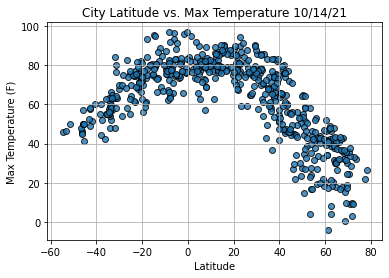

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

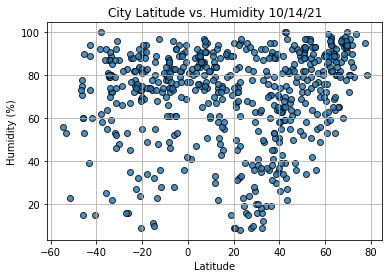

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

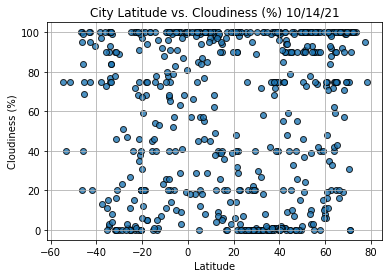

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

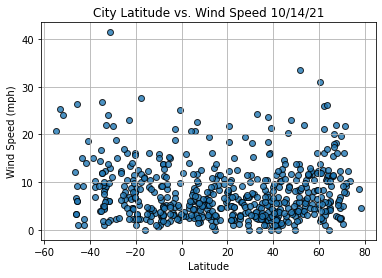

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [16]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

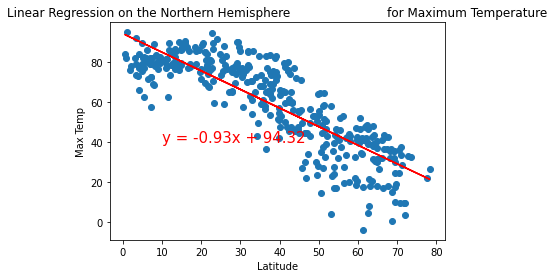

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

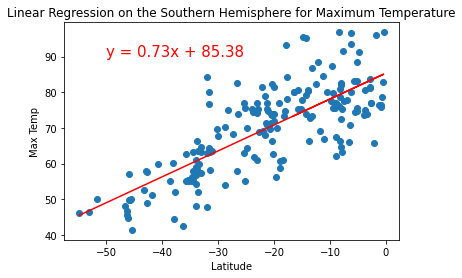

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

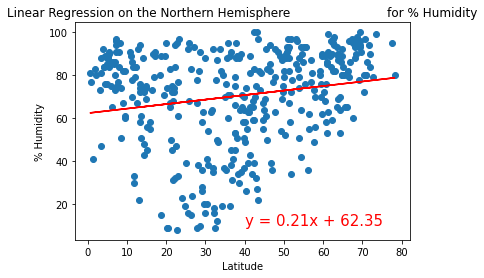

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

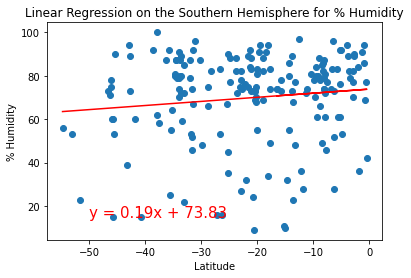

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

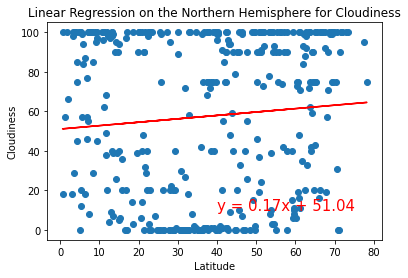

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Cloudiness', 'Cloudiness',(40,10))

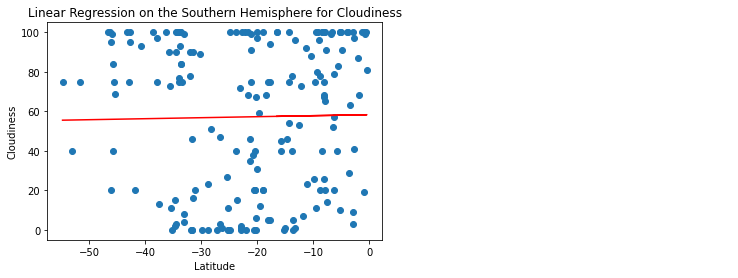

In [34]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Cloudiness', 'Cloudiness',(40,10))

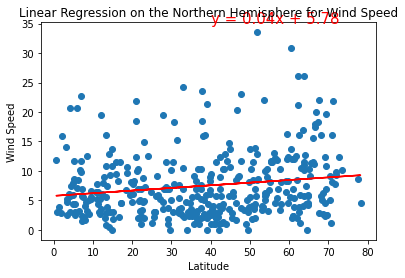

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

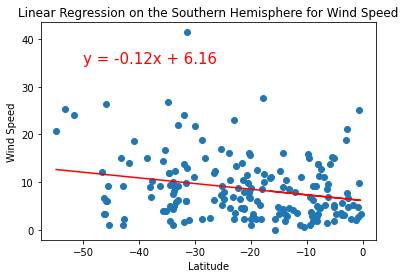

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))